In [ ]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd

auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

worksheet = gc.open('spread 1').sheet1

rows = worksheet.get_all_values()

df = pd.DataFrame(rows[1:], columns=rows[0])
df = df.astype({'id':'int'})
df = df.astype({'age':'int'})
df.head(10)


,id,age
0,1,10
1,2,20
2,3,30
3,4,40
4,5,50
5,6,60
6,7,70
7,8,80
8,9,90


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [ ]:
x=df[['id']].values
y=df[['age']].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=33)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(x)
x_n = scaler.fit_transform(x)

In [ ]:
x_train1=scaler.transform(x_train)
x_train1


array([[0.125],
       [0.625],
       [0.25 ],
       [0.   ],
       [0.875],
       [0.5  ]])

In [ ]:
ai_brain=Sequential([
    Dense(8,activation = 'relu'),
    Dense(10,activation = 'relu'),
    Dense(1)
])

In [ ]:
ai_brain.compile(optimizer='rmsprop',loss='mse')

In [ ]:
ai_brain.fit(x_train1,y_train,epochs=2000)

Epoch 1/2000
1/1 [==============================] - 0s 490ms/step - loss: 2321.1064
Epoch 2/2000
1/1 [==============================] - 0s 13ms/step - loss: 2318.0212
Epoch 3/2000
1/1 [==============================] - 0s 7ms/step - loss: 2315.7822
Epoch 4/2000
1/1 [==============================] - 0s 7ms/step - loss: 2313.9297
Epoch 5/2000
1/1 [==============================] - 0s 7ms/step - loss: 2312.2871
Epoch 6/2000
1/1 [==============================] - 0s 7ms/step - loss: 2310.8098
Epoch 7/2000
1/1 [==============================] - 0s 7ms/step - loss: 2309.4302
Epoch 8/2000
1/1 [==============================] - 0s 8ms/step - loss: 2308.1399
Epoch 9/2000
1/1 [==============================] - 0s 6ms/step - loss: 2306.9182
Epoch 10/2000
1/1 [==============================] - 0s 6ms/step - loss: 2305.7864
Epoch 11/2000
1/1 [==============================] - 0s 10ms/step - loss: 2304.6833
Epoch 12/2000
1/1 [==============================] - 0s 6ms/step - loss: 2303.6577
Epoch 13/

<Axes: >

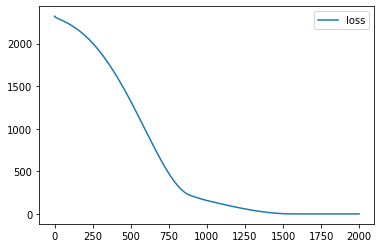

In [ ]:
loss_df=pd.DataFrame(ai_brain.history.history)
loss_df.plot()

In [ ]:
x_test1=scaler.transform(x_test)

In [ ]:
ai_brain.evaluate(x_test1,y_test)

1/1 [==============================] - 0s 109ms/step - loss: 0.0073


0.007306406740099192

In [ ]:
x_n1=[[4]]

In [ ]:
x_n1_1=scaler.transform(x_n1)


In [ ]:
ai_brain.predict(x_n1_1)


1/1 [==============================] - 0s 76ms/step


array([[40.060257]], dtype=float32)